In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from PIL import Image, ImageEnhance, ImageFilter

In [2]:
train_path = './chest_xray/train'
test_path = './chest_xray/test'
val_path = './chest_xray/val'

labels = ['NORMAL','PNEUMONIA']
size_1 = 500
size_2 = 250

In [3]:
def enhancer(img):
    img_enhanced = ImageEnhance.Sharpness(img).enhance(2.0)
    img_enhanced = ImageEnhance.Color(img_enhanced).enhance(2.0)
    img_enhanced = ImageEnhance.Contrast(img_enhanced).enhance(2.0)
    return img_enhanced

def create_data(target_path):
    data = []
    # count = 0
    for label in labels:
        path = os.path.join(target_path, label)
        label_num = labels.index(label)
        for img in os.listdir(path):
            try:
                # Read Image
                img_arr = Image.open(os.path.join(path,img)).convert('L')
                # Enhance Image
                enchanced = enhancer(img_arr)
                # resize to 500x500
                enchanced = enchanced.resize((size_1, size_1), Image.BICUBIC)
                # Crop Image
                left = 50
                top = 50
                right = 450
                bottom = 450
                crop_image = enchanced.crop((left, top, right, bottom))
                # resize to 250x250 and make it to an array
                new_arr = crop_image.resize((size_2, size_2), Image.BICUBIC).getdata()
                # add to data
                data.append([new_arr, label_num])
            except Exception as e:
                print(e)
                print(path)
                print(img)

    return data

In [4]:
def prep_data(prep_path):
    data = create_data(prep_path)
    random.shuffle(data)

    X = []
    y = []

    for features, label in data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, size_2, size_2, 1)
    y = np.array(y)

    return X,y

In [8]:
X_val, y_val = prep_data(val_path)
# X_train, y_train = prep_data(train_path)
# X_test, y_test = prep_data(test_path)

In [7]:
print(len(y_train))
X_train.shape

5216


(5216, 250, 250, 1)

In [8]:
y_train[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [11]:
# save pickle
pickle_out = open("./arr_enhanced/X_val_enhanced.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("./arr_enhanced/y_val_enhanced.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

In [3]:
# load pickle
pickle_in = open('./arr_enhanced/X_test_enhanced.pickle','rb')
X_test = pickle.load(pickle_in)

# pickle_in = open('./arr_balanced/y_train_balanced.pickle','rb')
# y_train = pickle.load(pickle_in)

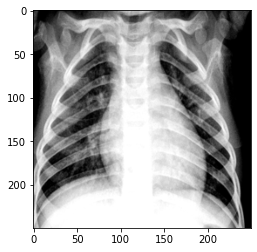

In [10]:
plt.imshow(X_val[0].reshape(size_2, size_2), cmap='gray')
plt.show()

In [11]:
X_train = X_train/255.0

In [8]:
print(type(X_train[0]))

<class 'numpy.ndarray'>
